In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [48]:
data = pd.read_csv("Ads.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [49]:
real_x = data.iloc[:,[2,3]].values
real_y = data.iloc[:,4].values
real_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1])

In [50]:
training_x,test_x,training_y,test_y = train_test_split(real_x,real_y, test_size=0.25, random_state=0)
training_x

array([[    42, 170000],
       [    39,  57000],
       [    32, 150000],
       [    21,  76000],
       [    30,  58000],
       [    30,  80000],
       [    65, 210000],
       [    19,  20000],
       [    26,  58000],
       [    20,  19000],
       [    37,  65000],
       [    36,  84000],
       [    41, 180000],
       [    45, 200000],
       [    55, 160000],
       [    25,  33000],
       [    40,  80000],
       [    23,  76000],
       [    27,  58000],
       [    29, 150000],
       [    28,  84000],
       [    26,  65000],
       [    35,  20000],
       [    32,  43000],
       [    32, 150000],
       [    25,  57000],
       [    27,  84000],
       [    28,  70000],
       [    43,  60000],
       [    50, 220000],
       [    34,  65000],
       [    35,  65000],
       [    34,  33000],
       [    46,  80000],
       [    27,  57000],
       [    19,  19000],
       [    46,  90000],
       [    37,  57000]])

In [51]:
s_c = StandardScaler()
training_x = s_c.fit_transform(training_x)
test_x = s_c.transform(test_x)
test_x


array([[ 0.71029172,  2.97927287],
       [-1.17511499, -1.22257397],
       [-1.37357885, -1.24084287],
       [ 0.313364  ,  2.97927287],
       [-0.77818726, -0.80238929],
       [-1.47281078,  1.15238294],
       [-1.37357885,  1.33507193],
       [-0.38125953, -1.22257397],
       [-0.77818726, -0.5283558 ],
       [-1.47281078, -0.19951561],
       [ 0.61105979,  1.15238294],
       [-1.37357885, -1.24084287],
       [-1.37357885, -0.05336442]])

In [52]:
cls = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p=2)
cls.fit(training_x, training_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
y_pred = cls.predict(test_x)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [54]:
test_y

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

# Confusion Matrix

In [55]:
c_m = confusion_matrix(test_y, y_pred)
c_m

array([[7, 1],
       [1, 4]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


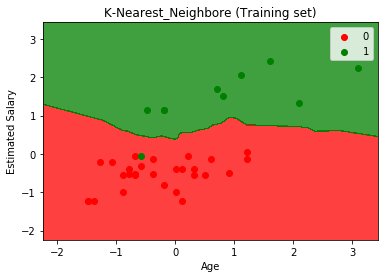

In [57]:
from matplotlib.colors import ListedColormap                #training
x_set, y_set = training_x, training_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
                    
plt.contourf(x1, x2, cls.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("K-Nearest_Neighbore (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()                    
                    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


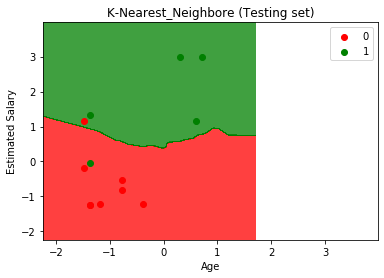

In [59]:
from matplotlib.colors import ListedColormap                #testing
x_set, y_set = test_x, test_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
                    
plt.contourf(x1, x2, cls.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("K-Nearest_Neighbore (Testing set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()                    
                    